# Movies in OTT Platforms

Movies are considered to be an important art forms, a world wide source of entertainment, and a powerful medium for educating or indoctrinating citizens. As far as the current pandemic situation is concerned, OTT platforms act as one of the most entertaining factors and a significant stress reliever for people around the globe.

This project aims to explore all the movies in popular OTT platforms, inorder to gain interesting insights. This is carried out with the aid of a Kaggle dataset, collected from Netflix,PrimeVideo,Hulu and Disney+ API.

Dataset contains the complete information of all the movies,their ratings and the corresponding OTT platforms in which they are available. It provides detailed information such as Year of release, Genre, IMDb rating, Director and the Language of each movie.

## Importing necessary libraries

In [804]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

In [805]:
movies=pd.read_csv('MoviesOnStreamingPlatforms.csv')

In [806]:
movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Check the size of the DataFrame

In [807]:
movies.shape

(16744, 17)

# Data Description

In [808]:
movies.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [809]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

# Data Cleaning

### Dropping duplicate records

In [810]:
movies.drop_duplicates(inplace=True)

### Dropping columns with no information

In [811]:
movies.drop(columns=['Unnamed: 0','ID','Type','Rotten Tomatoes'],inplace=True)

- the Type column is only having value 0 which does not contain any valuable information for EDA process.
- Rotten Tomatoes column contains almost 70% of NULL values. So, inputing it with values may change the actual meaning of the data. Hence, the column is dropped.

### Handling Null values

checking the total null values in each column.

In [812]:
movies.isnull().sum()

Title             0
Year              0
Age            9390
IMDb            571
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Directors       726
Genres          275
Country         435
Language        599
Runtime         592
dtype: int64

- Directors column has 726 NULL values as the above data includes non-fictional shows. Hence, those records cannot be filled with other values.

Mean: 5.902751499412594 Median: 6.1


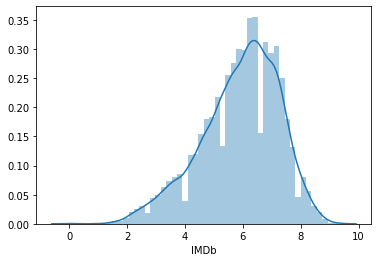

In [815]:
sns.distplot(movies['IMDb'])
print('Mean:',movies['IMDb'].mean(),'Median:',movies['IMDb'].median())

- the above figure shows that the IMDb column is normally distributed with mean and median almost equal which shows that there are no outliers in the dataset.
- Hence we are filling the IMDb column with the median value.

In [816]:
movies['IMDb'].fillna(movies['IMDb'].median(),inplace=True)

We are going to delete records where more than 8 columns are null values which may not be used for any kind of analysis.

In [819]:
movies.dropna(axis=0,thresh=8,inplace=True)

### Conversion of object column to integer to get some useful insights from age column

In [821]:
movies['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

In [822]:
movies['Age'].replace({'18+':18},inplace=True)
movies['Age'].replace({'7+':7},inplace=True)
movies['Age'].replace({'13+':13},inplace=True)
movies['Age'].replace({'all':0},inplace=True)
movies['Age'].replace({'16+':16},inplace=True)

In [823]:
movies.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13.0,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18.0,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13.0,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7.0,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


# Visualization

### movie count across each platform

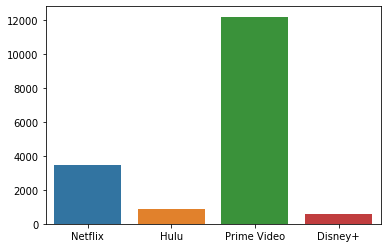

In [824]:
sns.barplot(x=['Netflix','Hulu','Prime Video','Disney+'],y=[movies['Netflix'].value_counts()[1],
                movies['Hulu'].value_counts()[1],movies['Prime Video'].value_counts()[1],
                movies['Disney+'].value_counts()[1]])

- Most of the movies in our data set are from prime video platform.
- followed by Netflix,Hulu and Disney+.

## Movies Distribution across Years

In [825]:
print('Movies released from the year %d are available in the above OTT platforms '%(movies['Year'].min()))
print('Many movies released in the year %d are available in the above OTT platforms '%(movies['Year'].median()))


Movies released from the year 1902 are available in the above OTT platforms 
Many movies released in the year 2012 are available in the above OTT platforms 


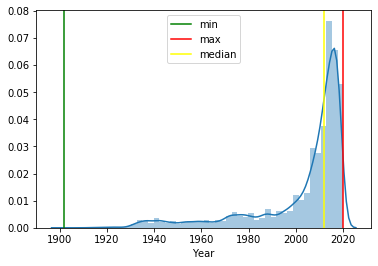

In [826]:
sns.distplot(movies['Year'])
plt.axvline(movies['Year'].min(),color='green',label='min')
plt.axvline(movies['Year'].max(),color='red',label='max')
plt.axvline(movies['Year'].median(),color='yellow',label='median')
plt.legend()

- Based on the above distribution it is clearly visible that we could find a lot of movies released between the years 2005 and 2020 in above OTT platforms.


In [827]:
print(movies['Year'].value_counts().head())

2017    1378
2018    1248
2016    1184
2015    1049
2014     974
Name: Year, dtype: int64


- Many movies in the OTT platforms are found in the year 2015,2016,2017,2018 which may be seen as the evolution years of these OTT platforms and probably many users started using these platforms during these years which have influenced them to get more movies.

## Visualization based on Genres

Genre column consists of various genres which are comma seperated. To derive useful information from it, we are converting it to a column of individual genres and storing it in another dataframe movies_Genre.

In [828]:
movies_Genre=movies.copy()
del movies_Genre['Genres']
s = movies['Genres'].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genres'
movies_Genre = movies_Genre.join(s)

In [829]:
movies_Genre.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Country,Language,Runtime,Genres
0,Inception,2010,13.0,8.8,1,0,0,0,Christopher Nolan,"United States,United Kingdom","English,Japanese,French",148.0,Action
0,Inception,2010,13.0,8.8,1,0,0,0,Christopher Nolan,"United States,United Kingdom","English,Japanese,French",148.0,Adventure
0,Inception,2010,13.0,8.8,1,0,0,0,Christopher Nolan,"United States,United Kingdom","English,Japanese,French",148.0,Sci-Fi
0,Inception,2010,13.0,8.8,1,0,0,0,Christopher Nolan,"United States,United Kingdom","English,Japanese,French",148.0,Thriller
1,The Matrix,1999,18.0,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski",United States,English,136.0,Action


### count of movies based on  Genres across all OTT Platform

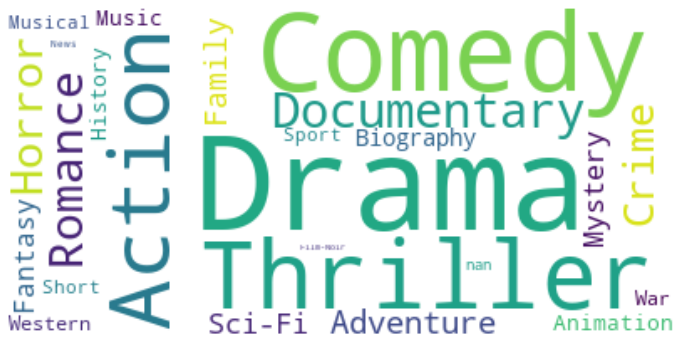

In [692]:
lis=[]
for i in movies_Genre['Genres']:
    lis.append(i)

for k in range(0,len(lis)):
    lis[k]=str(lis[k]).strip()
    
from collections import Counter
genre_count = Counter(lis)

from wordcloud import WordCloud
wc = WordCloud(background_color='white')
wc.generate_from_frequencies(genre_count)
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

- All the OTT Platforms serve variety of Genres staring from Drama to news. 
- Out of all the Genres the Drama,Comedy,Thriller and Action forms the majority across all the Platforms.
- This shows that the OTT platdforms are more interested to buy these genres which typliaclly shows the choice of Genres among the audiences.

### Count of movies based on Genres across each OTT Platform

- Let's deeply visualize the genres spread across each platform one by one.

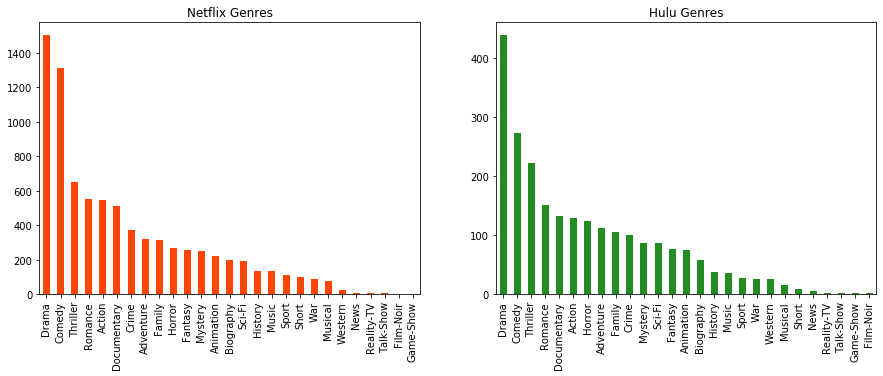

In [830]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
movies_Genre.loc[movies_Genre['Netflix']==1,'Genres'].value_counts().plot(kind='bar',ax=axes[0],color='orangered')
movies_Genre.loc[movies_Genre['Hulu']==1,'Genres'].value_counts().plot(kind='bar',ax=axes[1],color='forestgreen')
axes[0].set_title('Netflix Genres')
axes[1].set_title('Hulu Genres')
plt.show()

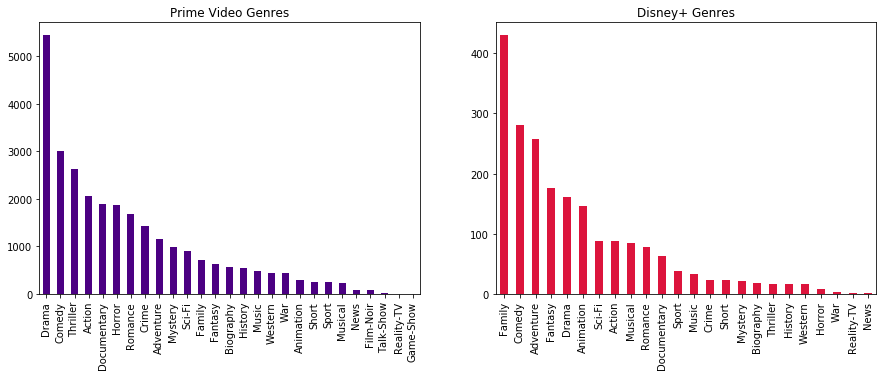

In [831]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
movies_Genre.loc[movies_Genre['Prime Video']==1,'Genres'].value_counts().plot(kind='bar',ax=axes[0],color='indigo')
movies_Genre.loc[movies_Genre['Disney+']==1,'Genres'].value_counts().plot(kind='bar',ax=axes[1],color='crimson')
axes[0].set_title('Prime Video Genres')
axes[1].set_title('Disney+ Genres')
plt.show()

- Drama has been one of the genres which is widely found across all the platforms with more number of movies which may be to attract the family crowd.
- All the genres are equally spread and found on each OTT platforms based on the above analysis.

### Average ratings of movies based on Genres across each OTT Platform

In [832]:
x=movies_Genre.loc[movies_Genre['Netflix']==1].groupby('Genres')['IMDb'].mean().reset_index().sort_values(by='IMDb',ascending=False)
y=movies_Genre.loc[movies_Genre['Hulu']==1].groupby('Genres')['IMDb'].mean().reset_index().sort_values(by='IMDb',ascending=False)
z=movies_Genre.loc[movies_Genre['Prime Video']==1].groupby('Genres')['IMDb'].mean().reset_index().sort_values(by='IMDb',ascending=False)
a=movies_Genre.loc[movies_Genre['Disney+']==1].groupby('Genres')['IMDb'].mean().reset_index().sort_values(by='IMDb',ascending=False)

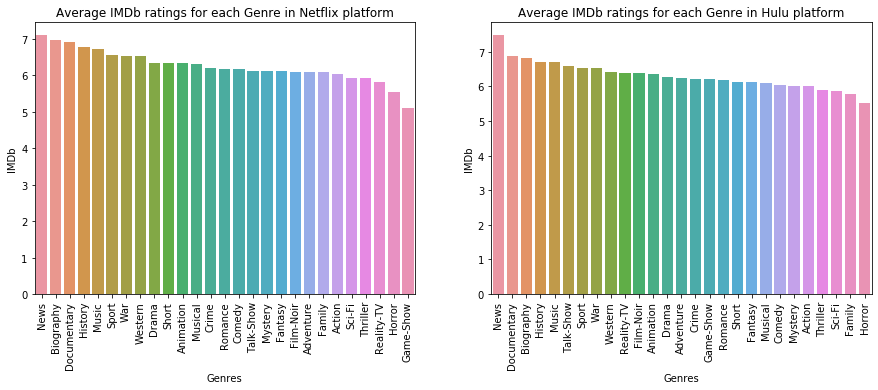

In [833]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x['Genres'],x['IMDb'],ax=axes[0])
axes[0].set_xticklabels(labels=x['Genres'],rotation=90)
axes[0].set_title('Average IMDb ratings for each Genre in Netflix platform')
sns.barplot(y['Genres'],y['IMDb'],ax=axes[1])
axes[1].set_xticklabels(labels=y['Genres'],rotation=90)
axes[1].set_title('Average IMDb ratings for each Genre in Hulu platform')
plt.show()

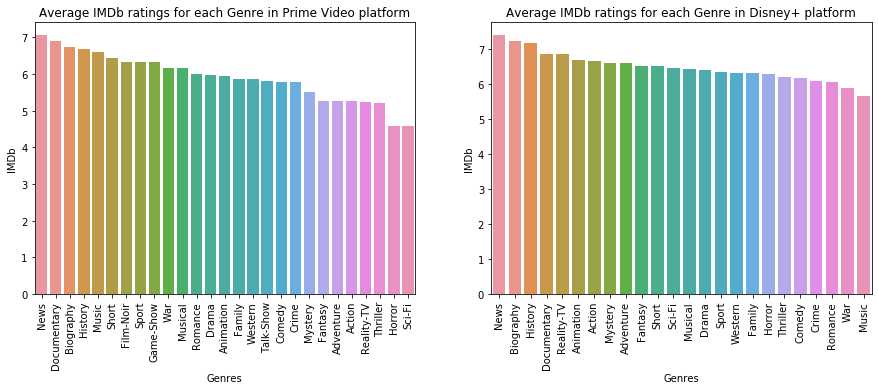

In [834]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.barplot(z['Genres'],z['IMDb'],ax=axes[0])
axes[0].set_xticklabels(labels=z['Genres'],rotation=90)
axes[0].set_title('Average IMDb ratings for each Genre in Prime Video platform')
sns.barplot(a['Genres'],a['IMDb'],ax=axes[1])
axes[1].set_xticklabels(labels=a['Genres'],rotation=90)
axes[1].set_title('Average IMDb ratings for each Genre in Disney+ platform')
plt.show()

- there is no huge difference in the average ratings for each genre across platforms which ranges between 6 and 7.5.

## Visualization based on Languages

- Language column consists of various Languages which are comma seperated. To derive useful information from it, we are converting it to a column of individual language and storing it in another dataframe movies_language.

In [835]:
movies_language=movies.copy()
t=movies_language['Language'].str.split(',').apply(pd.Series,1).stack()
t.index=t.index.droplevel(-1)
del movies_language['Language']
t.name='Language'
movies_language=movies_language.join(t)

In [836]:
movies_language.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Runtime,Language
0,Inception,2010,13.0,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom",148.0,English
0,Inception,2010,13.0,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom",148.0,Japanese
0,Inception,2010,13.0,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom",148.0,French
1,The Matrix,1999,18.0,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,136.0,English
2,Avengers: Infinity War,2018,13.0,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,149.0,English


### Top 20 languages across all the platforms

In [837]:
top_20=movies_language['Language'].value_counts().head(20).reset_index()
top_20

,index,Language
0,English,13233
1,Spanish,872
2,French,799
3,Hindi,731
4,German,483
5,Italian,440
6,Mandarin,352
7,Japanese,317
8,Russian,222
9,Arabic,190


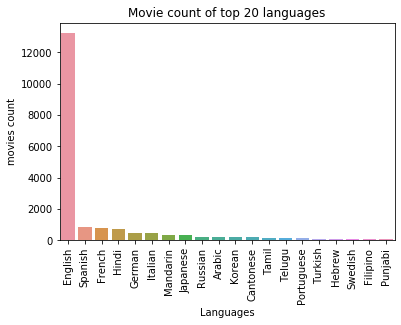

In [838]:
sns.barplot(top_20['index'],top_20['Language'])
plt.xticks(rotation=90)
plt.xlabel('Languages')
plt.ylabel('movies count')
plt.title('Movie count of top 20 languages')
plt.show()

- It is clearly visible that most of the movies are from English which shows that all the platforms are trying to get viewership across the globe.
- Indian regional languages like Hindi,Tamil,telugu,Punjabi is among the top 20 which shows that all the OTT platforms has a good reach and viewership in India.
- a wide range of European language can be seen in the top 20 which again shows the popularity among the European nations.

### Average IMDb ratings for the top 20 languages

In [839]:
timdb=pd.pivot_table(movies_language,index=['Language'],values='IMDb',aggfunc='median')

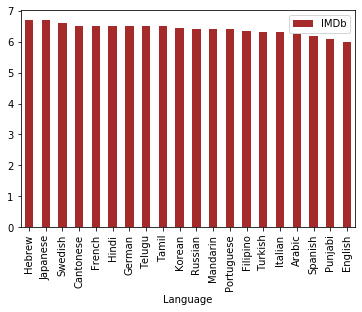

In [841]:
timdb.loc[['English','Spanish','French','Hindi','German','Italian','Mandarin','Japanese','Russian','Arabic','Korean',
          'Cantonese','Tamil','Telugu','Portuguese','Turkish','Hebrew','Swedish','Filipino','Punjabi']].sort_values('IMDb',ascending=False).plot(kind='bar',color='brown')
plt.show()

- Even in the case of languages there is not a distinct difference in IMDb ratings which is between 6-7. 

### Top 5 languages based on movie count across the OTT Platforms

In [842]:
top_5_netflix=movies_language.loc[movies_language['Netflix']==1,'Language'].value_counts().head(5).reset_index()
top_5_prime=movies_language.loc[movies_language['Prime Video']==1,'Language'].value_counts().head(5).reset_index()
top_5_hulu=movies_language.loc[movies_language['Hulu']==1,'Language'].value_counts().head(5).reset_index()
top_5_disney=movies_language.loc[movies_language['Disney+']==1,'Language'].value_counts().head(5).reset_index()

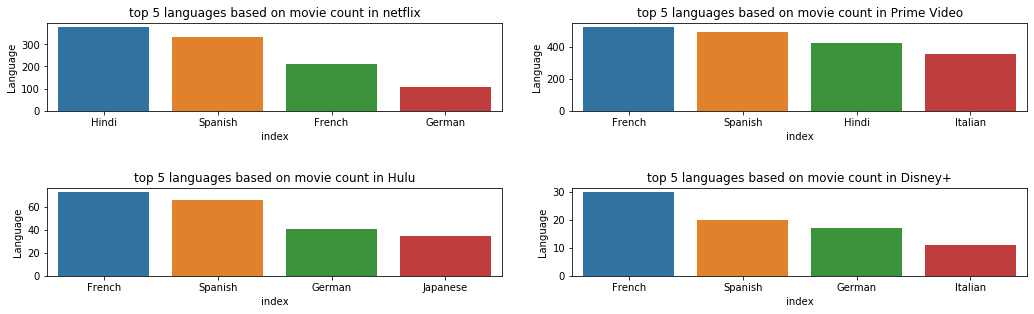

In [843]:
fig,axes=plt.subplots(2,2,figsize=(15,5))
sns.barplot(top_5_netflix.loc[1:,'index'],top_5_netflix.loc[1:,'Language'],ax=axes[0,0])
sns.barplot(top_5_prime.loc[1:,'index'],top_5_prime.loc[1:,'Language'],ax=axes[0,1])
sns.barplot(top_5_hulu.loc[1:,'index'],top_5_hulu.loc[1:,'Language'],ax=axes[1,0])
sns.barplot(top_5_disney.loc[1:,'index'],top_5_disney.loc[1:,'Language'],ax=axes[1,1])
axes[0,0].set_title('top 5 languages based on movie count in netflix')
axes[0,1].set_title('top 5 languages based on movie count in Prime Video')
axes[1,0].set_title('top 5 languages based on movie count in Hulu')
axes[1,1].set_title('top 5 languages based on movie count in Disney+')
fig.tight_layout(pad=3.0)
plt.show()

- The above visualization depicts the top 5 languages(other than English) having the highest movie count in different OTT platforms.
- As seen earlier all OTT Platforms are having higher number of English language movies.
- If you want to watch hindi movies you can go with Netflix and Prime Video with more than 400 movies.
- Spanish language movies are equally spread and having more count across all the OTT platforms.
- German movies can be viewed in netflix with more than 100 movies.

## Analysis based on Age

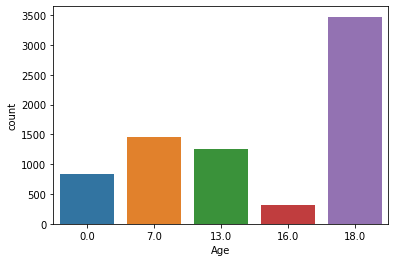

In [845]:
sns.countplot(movies['Age'])
plt.show()

- 0 indicates no restriction in the age group in the above dataset
- it is clearly visible that most of the shows in the OTT platforms are targeted for age group greater than 18.
- Followed by age group of 7 and 13 which may include movies of kid genre.

## Analysis based on Directors

- Directors column consists of various Director names comma seperated. To derive useful information from it, we are converting it to a column of individual directors and storing it in new dataframe movie_director.

In [846]:
movie_director=movies_Genre.copy()
s=movie_director['Directors'].str.split(',').apply(pd.Series).stack()
del movie_director['Directors']
s.index=s.index.droplevel(-1)
s.name='director'
movie_director=movie_director.join(s)

In [847]:
movie_director.drop_duplicates(inplace=True)

In [848]:
movie_director.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Country,Language,Runtime,Genres,director
0,Inception,2010,13.0,8.8,1,0,0,0,"United States,United Kingdom","English,Japanese,French",148.0,Action,Christopher Nolan
0,Inception,2010,13.0,8.8,1,0,0,0,"United States,United Kingdom","English,Japanese,French",148.0,Adventure,Christopher Nolan
0,Inception,2010,13.0,8.8,1,0,0,0,"United States,United Kingdom","English,Japanese,French",148.0,Sci-Fi,Christopher Nolan
0,Inception,2010,13.0,8.8,1,0,0,0,"United States,United Kingdom","English,Japanese,French",148.0,Thriller,Christopher Nolan
1,The Matrix,1999,18.0,8.7,1,0,0,0,United States,English,136.0,Action,Lana Wachowski


## Top 10 movie directors

### Based on movie count

In [849]:
movie_director['director'].value_counts().head(10)

Joseph Kane         116
Sam Newfield         72
Jim Wynorski         69
Cheh Chang           68
Mark Atkins          66
William Beaudine     66
Fred Olen Ray        59
Paul Hoen            57
Robert Stevenson     50
Richard Rich         50
Name: director, dtype: int64

In [850]:
movie_director_10=movies.copy()
s=movie_director_10['Directors'].str.split(',').apply(pd.Series).stack()
del movie_director_10['Directors']
s.index=s.index.droplevel(-1)
s.name='director'
movie_director_10=movie_director_10.join(s)

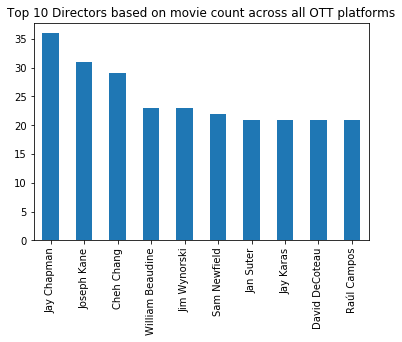

In [851]:
movie_director_10['director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Directors based on movie count across all OTT platforms')
plt.show()

- A wide variety of about 35 movies directed by Jay Chapman can be viewed across all OTT platform.
- Followed by Joseph kane,Cheh Chang who directed about 20 movies.

### Genres directed by top 10 directors

In [853]:
s=pd.crosstab(movie_director['Genres'],movie_director['director']).loc[:,['Joseph Kane','Sam Newfield','Jim Wynorski','Cheh Chang',
                                                     'Mark Atkins','William Beaudine','Fred Olen Ray',
                                                     'Paul Hoen','Robert Stevenson','Richard Rich']]

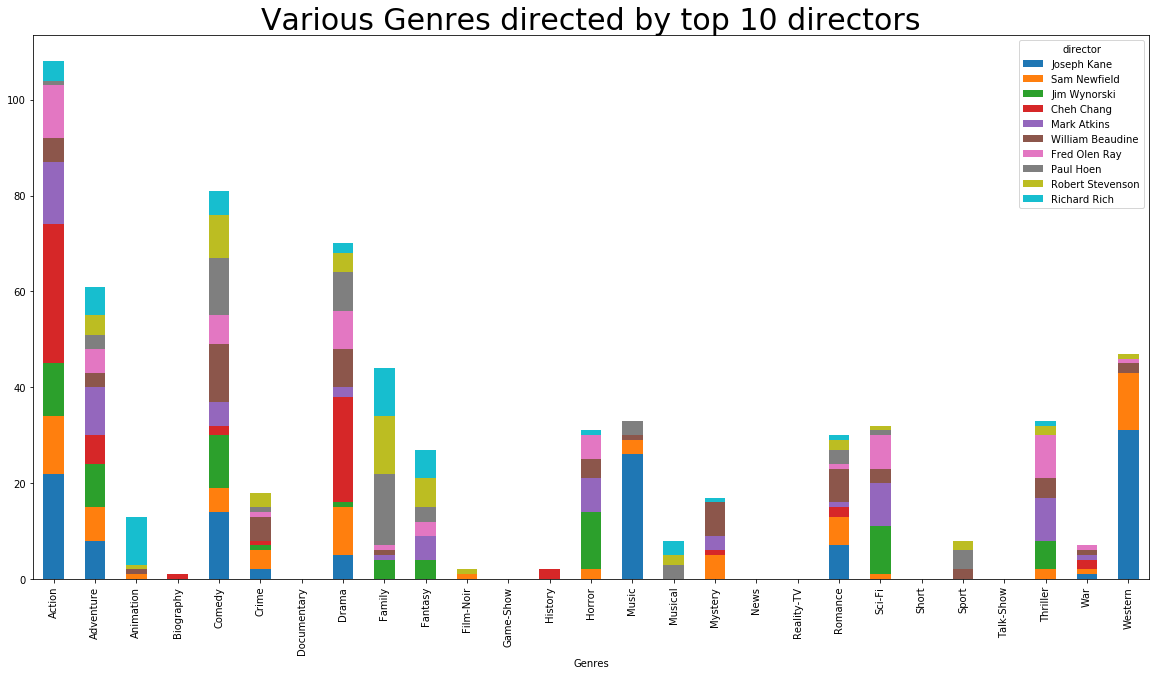

In [854]:
s.plot(kind='bar',stacked=True,figsize=(20,10))
plt.title('Various Genres directed by top 10 directors',fontdict={'fontsize':30})
plt.show()

- Based on the above visualization we can infer that most of the action,comedy,music and western genre movies are directed by Joseph Kane.
- Also, a wide range of action and drama genre movies are directed by Cheh Chang.
- If you want to go with thriller movies, then you'll have a wide availability of movies directed by Fred Olen Ray and Mark Atkins.
- William Beaudine has directed movies in almost all the above mentioned genres.

# Conclusion


This kernel is an attempt to understand the insights of all the movies across popular OTT platforms. I hope it has tried to do justice to it and you liked the notebook. Yet a lot of newer insights still can be gained on further exploration of the data, the kernel will be updated in the future of that.

Being my first attempt at EDA, I would appreciate any suggestions or comments from the community.